In [40]:
#test LSTM  input 4D  open high low close
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

print("now =", datetime.now())

now = 2020-05-29 13:06:39.552606


In [82]:
#load data and insert header ['Index','Time','Open','High','Low','Close','Volume']
H_=['Index','Time','Open','High','Low','Close','Volume']

data_Mn=pd.read_csv('data/EURUSDm43200.csv', names = H_)
data_Wk=pd.read_csv('data/EURUSDm10080.csv', names = H_)
data_D=pd.read_csv('data/EURUSDm1440.csv', names = H_)

#data_Mn.tail()
#---------------------predata from df to array และไม่เอาข้อมูลสุดท้าย---------------------
train_data_Mn=data_Mn.iloc[:-1,2:6].values   
train_data_Wk=data_Wk.iloc[:-1,2:6].values 
train_data_D=data_D.iloc[:-1,2:6].values 

print(type(data_Mn),'Mn.shape=',data_Mn.shape)
print(type(train_data_Mn),'Mn.shape=',train_data_Mn.shape)

print(type(data_Wk),'Wk.shape=',data_Wk.shape)
print(type(train_data_Wk),'Wk.shape=',train_data_Wk.shape)

print(type(data_D),'D.shape=',data_D.shape)
print(type(train_data_D),'D.shape=',train_data_D.shape)

print(train_data_Mn[:,:])
print(train_data_Wk[:,:])
print(train_data_D[:,:])
print("now =", datetime.now())

<class 'pandas.core.frame.DataFrame'> Mn.shape= (270, 7)
<class 'numpy.ndarray'> Mn.shape= (269, 4)
<class 'pandas.core.frame.DataFrame'> Wk.shape= (873, 7)
<class 'numpy.ndarray'> Wk.shape= (872, 4)
<class 'pandas.core.frame.DataFrame'> D.shape= (1393, 7)
<class 'numpy.ndarray'> D.shape= (1392, 4)
[[1.1045  1.1191  1.07    1.0765 ]
 [1.0765  1.1045  1.0728  1.09149]
 [1.09149 1.098   1.0745  1.0767 ]
 ...
 [1.10895 1.10901 1.07773 1.10212]
 [1.10411 1.1496  1.06335 1.10255]
 [1.10257 1.10357 1.07267 1.09445]]
[[1.13589 1.1534  1.13589 1.1477 ]
 [1.1477  1.1766  1.1394  1.1568 ]
 [1.1568  1.1857  1.1532  1.18009]
 ...
 [1.09604 1.09605 1.07662 1.08375]
 [1.08374 1.08959 1.07745 1.08184]
 [1.08183 1.10078 1.07994 1.09077]]
[[1.05686 1.06365 1.05626 1.06257]
 [1.06251 1.06316 1.05502 1.06098]
 [1.06096 1.09802 1.05177 1.09168]
 ...
 [1.09076 1.0914  1.08702 1.09012]
 [1.09013 1.09954 1.08964 1.09781]
 [1.0978  1.10302 1.09335 1.10162]]
now = 2020-05-29 17:51:57.388691


In [86]:
# ================predata LSTM form==================
#------ จัดเรียงข้อมูล  Mn-------- 
X_train_Mn=[]
Y_train_Mn=[]
X_predict_Mn=[]
windows=20

for i in range(windows, len(train_data_Mn)):
        X_train_Mn.append(train_data_Mn[i-windows:i,:])
        Y_train_Mn.append(train_data_Mn[i,:])
        if(i >= len(train_data_Mn)-1):
            X_predict_Mn.append(train_data_Mn[i-windows+1:i+1,:])

#print(X_train_Mn)
#print('Y===================',Y_train_Mn)
#print('predict================',X_predict_Mn)
#print(len(X_train_Mn))
#print(len(X_predict_Mn))
#print(len(Y_train_Mn))

            #------ to 3D input LSTM ------------

X_train_Mn, X_predict_Mn, Y_train_Mn = np.array(X_train_Mn), np.array(X_predict_Mn), np.array(Y_train_Mn)

print('X_train_Mn.shape=',X_train_Mn.shape)
print('X_predict_Mn.shape=',X_predict_Mn.shape)
print('Y_train_Mn.shape=',Y_train_Mn.shape)

X_train_Mn=np.reshape(X_train_Mn, (X_train_Mn.shape[0], X_train_Mn.shape[1], X_train_Mn.shape[2]))

X_predict_Mn=np.reshape(X_predict_Mn, (X_predict_Mn.shape[0], X_predict_Mn.shape[1], X_predict_Mn.shape[2]))

#print(X_train_Mn.shape[0])
#print(X_train_Mn.shape[1])
#print(X_train_Mn.shape[2])

#print(X_train_Mn)
#print(X_predict_Mn)
#print(Y_train_Mn)

#------ จัดเรียงข้อมูล  Wk-------- 
X_train_Wk=[]
Y_train_Wk=[]
X_predict_Wk=[]

for i in range(windows, len(train_data_Wk)):
        X_train_Wk.append(train_data_Wk[i-windows:i,:])
        Y_train_Wk.append(train_data_Wk[i,:])
        if(i >= len(train_data_Wk)-1):
            X_predict_Wk.append(train_data_Wk[i-windows+1:i+1,:])

#print(X_train_Wk)
#print('Y===================',Y_train_Wk)
#print('predict================',X_predict_Wk)
#print(len(X_train_Wk))
#print(len(X_predict_Wk))
#print(len(Y_train_Wk))

            #------ to 3D input LSTM ------------

X_train_Wk, X_predict_Wk, Y_train_Wk = np.array(X_train_Wk), np.array(X_predict_Wk), np.array(Y_train_Wk)

print('X_train_Wk.shape=',X_train_Wk.shape)
print('X_predict_Wk.shape=',X_predict_Wk.shape)
print('Y_train_Wk.shape=',Y_train_Wk.shape)

X_train_Wk=np.reshape(X_train_Wk, (X_train_Wk.shape[0], X_train_Wk.shape[1], X_train_Wk.shape[2]))

X_predict_Wk=np.reshape(X_predict_Wk, (X_predict_Wk.shape[0], X_predict_Wk.shape[1], X_predict_Wk.shape[2]))

#print(X_train_Wk.shape[0])
#print(X_train_Wk.shape[1])
#print(X_train_Wk.shape[2])

#print(X_train_Wk)
#print(X_predict_Wk)
#print(Y_train_Wk)

#------ จัดเรียงข้อมูล  D-------- 
X_train_D=[]
Y_train_D=[]
X_predict_D=[]

for i in range(windows, len(train_data_D)):
        X_train_D.append(train_data_D[i-windows:i,:])
        Y_train_D.append(train_data_D[i,:])
        if(i >= len(train_data_D)-1):
            X_predict_D.append(train_data_D[i-windows+1:i+1,:])

#print(X_train_D)
#print('Y===================',Y_train_D)
#print('predict================',X_predict_D)
#print(len(X_train_D))
#print(len(X_predict_D))
#print(len(Y_train_D))

            #------ to 3D input LSTM ------------

X_train_D, X_predict_D, Y_train_D = np.array(X_train_D), np.array(X_predict_D), np.array(Y_train_D)

print('X_train_D.shape=',X_train_D.shape)
print('X_predict_D.shape=',X_predict_D.shape)
print('Y_train_D.shape=',Y_train_D.shape)

X_train_D=np.reshape(X_train_D, (X_train_D.shape[0], X_train_D.shape[1], X_train_D.shape[2]))

X_predict_D=np.reshape(X_predict_D, (X_predict_D.shape[0], X_predict_D.shape[1], X_predict_D.shape[2]))

print(X_train_D.shape[0])
#print(X_train_D.shape[1])
#print(X_train_D.shape[2])

#print(X_train_D)
#print(X_predict_D)
print(Y_train_D)

X_train_Mn.shape= (249, 20, 4)
X_predict_Mn.shape= (1, 20, 4)
Y_train_Mn.shape= (249, 4)
X_train_Wk.shape= (852, 20, 4)
X_predict_Wk.shape= (1, 20, 4)
Y_train_Wk.shape= (852, 4)
X_train_D.shape= (1372, 20, 4)
X_predict_D.shape= (1, 20, 4)
Y_train_D.shape= (1372, 4)
1372
[[1.09074 1.09668 1.09074 1.09647]
 [1.09587 1.09699 1.09481 1.09633]
 [1.09627 1.09919 1.09552 1.09738]
 ...
 [1.09076 1.0914  1.08702 1.09012]
 [1.09013 1.09954 1.08964 1.09781]
 [1.0978  1.10302 1.09335 1.10162]]


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
print(datetime.now())

2020-05-29 13:06:53.090381


In [44]:
#============ Model LSTM ================
node1_4=60    # node unit     Mn Wk D
D_O=0.3         # Drop Out   Mn Wk D
ep_Mn=2000             #epoch Mn Wk D
ep_Wk=2000             #epoch Wk 
ep_D=2000             #epoch D

time_1=datetime.now()

#------ Model  Mn--------
model_Mn = Sequential()
model_Mn.add(LSTM(units=node1_4, return_sequences = True, input_shape= (X_train_Mn.shape[1], X_train_Mn.shape[2])))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(units=node1_4, return_sequences = True))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(units=node1_4, return_sequences = True))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(units=node1_4))
model_Mn.add(Dropout(D_O))

model_Mn.add(Dense(X_train_Mn.shape[2]))   #output 4

model_Mn.compile(optimizer='adam', loss='mean_squared_error')
model_Mn.fit(X_train_Mn, Y_train_Mn, epochs=ep_Mn)

time_2=datetime.now()

print('....................................... End Mn .....................................................')

#------ Model  Wk--------
model_Wk = Sequential()
model_Wk.add(LSTM(units=node1_4, return_sequences = True, input_shape= (X_train_Wk.shape[1], X_train_Wk.shape[2])))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(units=node1_4, return_sequences = True))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(units=node1_4, return_sequences = True))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(units=node1_4))
model_Wk.add(Dropout(D_O))

model_Wk.add(Dense(X_train_Wk.shape[2]))   #output 4

model_Wk.compile(optimizer='adam', loss='mean_squared_error')
model_Wk.fit(X_train_Wk, Y_train_Wk, epochs=ep_Wk)

time_3=datetime.now()

print('...................................... End Wk ......................................................')

#------ Model  D--------
model_D = Sequential()
model_D.add(LSTM(units=node1_4, return_sequences = True, input_shape= (X_train_D.shape[1], X_train_D.shape[2])))
model_D.add(Dropout(D_O))

model_D.add(LSTM(units=node1_4, return_sequences = True))
model_D.add(Dropout(D_O))

model_D.add(LSTM(units=node1_4, return_sequences = True))
model_D.add(Dropout(D_O))

model_D.add(LSTM(units=node1_4))
model_D.add(Dropout(D_O))

model_D.add(Dense(X_train_D.shape[2]))   #output 4

model_D.compile(optimizer='adam', loss='mean_squared_error')
model_D.fit(X_train_D, Y_train_D, epochs=ep_D)

time_4=datetime.now()

print('.................................... End D........................................................')


print('time model_Mn = ', time_2 - time_1)
print('time model_Wk = ', time_3 - time_2)
print('time model_D = ', time_4 - time_3)

Epoch 1/2000
249/249 [==============================] - 2s 8ms/step - loss: 0.7437
Epoch 2/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.1542
Epoch 3/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0996
Epoch 4/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0719
Epoch 5/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0673
Epoch 6/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0727
Epoch 7/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0660
Epoch 8/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 9/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0637
Epoch 10/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0615
Epoch 11/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0682
Epoch 12/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0569
E

249/249 [==============================] - 1s 3ms/step - loss: 0.0214
Epoch 99/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0228
Epoch 100/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0200
Epoch 101/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0224
Epoch 102/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0221
Epoch 103/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0210
Epoch 104/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0205
Epoch 105/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0211
Epoch 106/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0237
Epoch 107/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0233
Epoch 108/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0244
Epoch 109/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0

249/249 [==============================] - 1s 3ms/step - loss: 0.0140
Epoch 195/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0152
Epoch 196/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0149
Epoch 197/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0136
Epoch 198/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0139
Epoch 199/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0115
Epoch 200/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0116
Epoch 201/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0128
Epoch 202/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0128
Epoch 203/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0141
Epoch 204/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0122
Epoch 205/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0092
Epoch 291/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 292/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0098
Epoch 293/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0102
Epoch 294/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 295/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0084
Epoch 296/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0100
Epoch 297/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0092
Epoch 298/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 299/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0095
Epoch 300/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 301/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 387/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 388/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 389/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0079
Epoch 390/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 391/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 392/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 393/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 394/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0077
Epoch 395/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 396/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 397/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 483/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 484/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 485/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 486/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 487/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 488/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 489/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0045
Epoch 490/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 491/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 492/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 493/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 579/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 580/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0034
Epoch 581/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 582/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 583/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0044
Epoch 584/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 585/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 586/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0033
Epoch 587/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 588/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 589/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 675/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 676/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 677/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 678/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 679/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 680/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 681/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 682/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 683/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 684/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 685/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 771/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 772/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 773/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 774/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 775/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 776/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 777/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 778/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 779/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 780/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 781/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 867/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 868/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 869/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 870/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 871/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 872/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 873/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 874/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 875/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 876/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 877/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.

249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 963/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 964/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 965/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012A: 0s - loss: 0.00
Epoch 966/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 967/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 968/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 969/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 970/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 971/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 972/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 973/2000
249/249 [==============================] - 1s 3

249/249 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 1058/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1059/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 1060/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 1061/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1062/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1063/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 1064/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 1065/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 1066/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 1067/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 1068/2000
249/249 [==============================] - 1s 3ms/step

249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1153/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1154/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 1155/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1156/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1157/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1158/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1159/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 1160/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 1161/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1162/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1163/2000
249/249 [==============================] - 1s 3ms/step

249/249 [==============================] - 1s 3ms/step - loss: 9.4013e-04
Epoch 1248/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9495e-04
Epoch 1249/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.7947e-04
Epoch 1250/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1251/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.2460e-04
Epoch 1252/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1253/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1254/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1255/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1256/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1257/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 1258/2000
249/249 [=============================

249/249 [==============================] - 1s 3ms/step - loss: 9.8363e-04
Epoch 1342/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1343/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9432e-04
Epoch 1344/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.6237e-04
Epoch 1345/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1346/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9831e-04
Epoch 1347/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1348/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1349/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1350/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1351/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.2139e-04
Epoch 1352/2000
249/249 [=========================

249/249 [==============================] - 1s 3ms/step - loss: 9.2084e-04
Epoch 1435/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1436/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010A: 0s - loss: 0
Epoch 1437/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9010e-04
Epoch 1438/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9186e-04
Epoch 1439/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 1440/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9557e-04
Epoch 1441/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9839e-04
Epoch 1442/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.5693e-04
Epoch 1443/2000
249/249 [==============================] - ETA: 0s - loss: 0.001 - 1s 3ms/step - loss: 9.7596e-04
Epoch 1444/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1848e-04

249/249 [==============================] - 1s 3ms/step - loss: 9.0473e-04
Epoch 1526/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1514e-04
Epoch 1527/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9532e-04
Epoch 1528/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.8296e-04
Epoch 1529/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.6659e-04
Epoch 1530/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1531/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9001e-04
Epoch 1532/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1537e-04A: 0s - loss: 0.001
Epoch 1533/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.8796e-04
Epoch 1534/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.3990e-04
Epoch 1535/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.2911e-04
Epoch 1536/

249/249 [==============================] - 1s 3ms/step - loss: 9.9597e-04
Epoch 1618/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.5811e-04
Epoch 1619/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9906e-04
Epoch 1620/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1672e-04
Epoch 1621/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.5015e-04
Epoch 1622/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.3575e-04
Epoch 1623/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1624/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.3228e-04
Epoch 1625/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1484e-04
Epoch 1626/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9012e-04
Epoch 1627/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1628/2000
249/249 [=========

249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1709/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.8198e-04
Epoch 1710/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.6625e-04
Epoch 1711/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9517e-04
Epoch 1712/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.2953e-04
Epoch 1713/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.0867e-04
Epoch 1714/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.5058e-04
Epoch 1715/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.6642e-04
Epoch 1716/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.2021e-04
Epoch 1717/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.6391e-04
Epoch 1718/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.2773e-04
Epoch 1719/2000
249/249 [=====

249/249 [==============================] - 1s 3ms/step - loss: 7.4073e-04
Epoch 1800/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.5940e-04
Epoch 1801/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.9648e-04
Epoch 1802/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.0154e-04
Epoch 1803/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1952e-04
Epoch 1804/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.8087e-04
Epoch 1805/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.4028e-04
Epoch 1806/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.6394e-04
Epoch 1807/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.3916e-04
Epoch 1808/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9191e-04
Epoch 1809/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.3348e-04
Epoch 1810/2000
249/249 [=

249/249 [==============================] - 1s 3ms/step - loss: 8.4541e-04
Epoch 1890/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.7401e-04
Epoch 1891/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.0405e-04
Epoch 1892/2000
249/249 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 1893/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9330e-04
Epoch 1894/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.5587e-04
Epoch 1895/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.1511e-04
Epoch 1896/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.0088e-04
Epoch 1897/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.5373e-04
Epoch 1898/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.9449e-04
Epoch 1899/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.5347e-04
Epoch 1900/2000
249/249 [=====

249/249 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 1981/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.5329e-04
Epoch 1982/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.8333e-04
Epoch 1983/2000
249/249 [==============================] - 1s 3ms/step - loss: 9.2787e-04
Epoch 1984/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.6811e-04
Epoch 1985/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.9857e-04
Epoch 1986/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.7623e-04
Epoch 1987/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.2835e-04
Epoch 1988/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.5095e-04
Epoch 1989/2000
249/249 [==============================] - 1s 3ms/step - loss: 7.5477e-04
Epoch 1990/2000
249/249 [==============================] - 1s 3ms/step - loss: 8.0136e-04
Epoch 1991/2000
249/249 [=====

Epoch 75/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0108
Epoch 76/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0091
Epoch 77/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0092
Epoch 78/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0100
Epoch 79/2000
852/852 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 80/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0101
Epoch 81/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0105
Epoch 82/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0081A: 0s - loss: 0.0 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 
Epoch 83/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0089A: 1s -
Epoch 84/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0100
Epoch 85/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0096
Epoch 86/

852/852 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 171/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 172/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 173/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 174/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 175/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 176/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0028
Epoch 177/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 178/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0031
Epoch 179/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0027
Epoch 180/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 181/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.

852/852 [==============================] - 3s 3ms/step - loss: 0.0010
Epoch 266/2000
852/852 [==============================] - 3s 3ms/step - loss: 8.9418e-04
Epoch 267/2000
852/852 [==============================] - 3s 3ms/step - loss: 9.1707e-04
Epoch 268/2000
852/852 [==============================] - 3s 3ms/step - loss: 8.7431e-04
Epoch 269/2000
852/852 [==============================] - 3s 3ms/step - loss: 0.0011- ETA: 1
Epoch 270/2000
852/852 [==============================] - 3s 3ms/step - loss: 9.4358e-04
Epoch 271/2000
852/852 [==============================] - 3s 3ms/step - loss: 7.6260e-04
Epoch 272/2000
852/852 [==============================] - 3s 3ms/step - loss: 7.8601e-04
Epoch 273/2000
852/852 [==============================] - 3s 3ms/step - loss: 8.4878e-04
Epoch 274/2000
852/852 [==============================] - 3s 3ms/step - loss: 8.2633e-04
Epoch 275/2000
852/852 [==============================] - 3s 3ms/step - loss: 7.2454e-04
Epoch 276/2000
852/852 [============

852/852 [==============================] - 3s 3ms/step - loss: 5.0917e-04
Epoch 358/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.5892e-04
Epoch 359/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.9792e-04
Epoch 360/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.3543e-04
Epoch 361/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.8082e-04A: 1s - 
Epoch 362/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.0767e-04
Epoch 363/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.4454e-04
Epoch 364/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.4613e-04
Epoch 365/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.0607e-04
Epoch 366/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.1943e-04
Epoch 367/2000
852/852 [==============================] - 3s 3ms/step - loss: 6.2943e-04
Epoch 368/2000
852/852 [====

852/852 [==============================] - 3s 3ms/step - loss: 4.2468e-04A: 1s -
Epoch 449/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.2869e-04
Epoch 450/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.0762e-04
Epoch 451/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.5238e-04
Epoch 452/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.7254e-04
Epoch 453/2000
852/852 [==============================] - 3s 3ms/step - loss: 5.7886e-04
Epoch 454/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.4953e-04
Epoch 455/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.5511e-04
Epoch 456/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.4667e-04
Epoch 457/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.4839e-04
Epoch 458/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.2129e-04
Epoch 459/2000
852/852 [=====

Epoch 539/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.0249e-04
Epoch 540/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.3641e-04A: 1
Epoch 541/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.2210e-04
Epoch 542/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5937e-04
Epoch 543/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.5004e-04
Epoch 544/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.4769e-04
Epoch 545/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.3639e-04
Epoch 546/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.3331e-04
Epoch 547/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.7893e-04
Epoch 548/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6418e-04
Epoch 549/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.1454e-04
Epoch 550/2000
85

852/852 [==============================] - 3s 3ms/step - loss: 3.5103e-04
Epoch 631/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6293e-04
Epoch 632/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.7478e-04
Epoch 633/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5403e-04
Epoch 634/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.9138e-04
Epoch 635/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6337e-04
Epoch 636/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.9688e-04
Epoch 637/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.1969e-04
Epoch 638/2000
852/852 [==============================] - 3s 3ms/step - loss: 4.4846e-04
Epoch 639/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6437e-04
Epoch 640/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3752e-04
Epoch 641/2000
852/852 [============

852/852 [==============================] - 3s 3ms/step - loss: 3.6439e-04
Epoch 722/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.8732e-04
Epoch 723/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3897e-04
Epoch 724/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5744e-04A: 1s - los
Epoch 725/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.2867e-04
Epoch 726/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6556e-04
Epoch 727/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.4506e-04
Epoch 728/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5772e-04
Epoch 729/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3786e-04
Epoch 730/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6042e-04
Epoch 731/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.2248e-04
Epoch 732/2000
852/852 [=

852/852 [==============================] - 3s 3ms/step - loss: 3.6116e-04
Epoch 813/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.9939e-04
Epoch 814/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.2479e-04
Epoch 815/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.9199e-04
Epoch 816/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6407e-04
Epoch 817/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3466e-04
Epoch 818/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6338e-04
Epoch 819/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5746e-04
Epoch 820/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.1821e-04
Epoch 821/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.1213e-04
Epoch 822/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.2664e-04
Epoch 823/2000
852/852 [============

852/852 [==============================] - 3s 3ms/step - loss: 3.2040e-04
Epoch 904/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.1951e-04
Epoch 905/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3502e-04
Epoch 906/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.2999e-04
Epoch 907/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5656e-04
Epoch 908/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3077e-04
Epoch 909/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5807e-04
Epoch 910/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3562e-04
Epoch 911/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.4547e-04
Epoch 912/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3480e-04
Epoch 913/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.0669e-04
Epoch 914/2000
852/852 [============

852/852 [==============================] - 3s 3ms/step - loss: 3.3740e-04
Epoch 996/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.1896e-04
Epoch 997/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.4837e-04
Epoch 998/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.4844e-04A: 0s - loss: 
Epoch 999/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3081e-04
Epoch 1000/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3132e-04
Epoch 1001/2000
852/852 [==============================] - 3s 3ms/step - loss: 2.9856e-04
Epoch 1002/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3553e-04
Epoch 1003/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.6605e-04
Epoch 1004/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.9271e-04
Epoch 1005/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.2783e-04
Epoch 1006/2000


852/852 [==============================] - 3s 3ms/step - loss: 3.8782e-04
Epoch 1086/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5094e-04
Epoch 1087/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5338e-04A:
Epoch 1088/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.1719e-04
Epoch 1089/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3299e-04
Epoch 1090/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.3592e-04
Epoch 1091/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.7856e-04
Epoch 1092/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.7625e-04
Epoch 1093/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.5371e-04
Epoch 1094/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.4445e-04
Epoch 1095/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.4770e-04
Epoch 1096/2000
852/852 

852/852 [==============================] - 2s 3ms/step - loss: 3.0872e-04
Epoch 1177/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9448e-04
Epoch 1178/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0922e-04
Epoch 1179/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0041e-04
Epoch 1180/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.0701e-04
Epoch 1181/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.5323e-04
Epoch 1182/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.6156e-04
Epoch 1183/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2044e-04
Epoch 1184/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0730e-04
Epoch 1185/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4656e-04
Epoch 1186/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3446e-04
Epoch 1187/2000
852/852 [=

852/852 [==============================] - 2s 3ms/step - loss: 3.4222e-04
Epoch 1267/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4681e-04
Epoch 1268/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.9201e-04
Epoch 1269/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4679e-04
Epoch 1270/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3965e-04
Epoch 1271/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3655e-04
Epoch 1272/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3924e-04
Epoch 1273/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.7956e-04
Epoch 1274/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.7309e-04
Epoch 1275/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1539e-04
Epoch 1276/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9771e-04
Epoch 1277/2000
852/852 [=

852/852 [==============================] - 2s 3ms/step - loss: 3.3123e-04
Epoch 1356/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.5127e-04
Epoch 1357/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1107e-04
Epoch 1358/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9867e-04
Epoch 1359/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2006e-04A: 0s - loss: 3.1440e-0
Epoch 1360/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.5265e-04
Epoch 1361/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1490e-04
Epoch 1362/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.8952e-04
Epoch 1363/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4312e-04
Epoch 1364/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.5264e-04
Epoch 1365/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3944e-04A: 1

852/852 [==============================] - 2s 3ms/step - loss: 3.1527e-04
Epoch 1445/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.8606e-04
Epoch 1446/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1543e-04
Epoch 1447/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9120e-04
Epoch 1448/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1294e-04
Epoch 1449/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2043e-04
Epoch 1450/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3688e-04
Epoch 1451/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2887e-04
Epoch 1452/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4313e-04
Epoch 1453/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0653e-04
Epoch 1454/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2984e-04
Epoch 1455/2000
852/852 [=

852/852 [==============================] - 2s 3ms/step - loss: 2.8675e-04
Epoch 1535/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0743e-04
Epoch 1536/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0674e-04
Epoch 1537/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3869e-04
Epoch 1538/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0562e-04
Epoch 1539/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1345e-04
Epoch 1540/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0823e-04
Epoch 1541/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1592e-04
Epoch 1542/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9287e-04
Epoch 1543/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4889e-04
Epoch 1544/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2998e-04
Epoch 1545/2000
852/852 [=

852/852 [==============================] - 2s 3ms/step - loss: 2.8753e-04
Epoch 1624/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9862e-04
Epoch 1625/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3730e-04
Epoch 1626/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3611e-04
Epoch 1627/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.5995e-04
Epoch 1628/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.5654e-04
Epoch 1629/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.6378e-04
Epoch 1630/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3235e-04
Epoch 1631/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0563e-04
Epoch 1632/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9866e-04
Epoch 1633/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4057e-04A: 0s - loss: 3.3568e-
Epoc

852/852 [==============================] - 2s 3ms/step - loss: 3.2740e-04
Epoch 1714/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4063e-04
Epoch 1715/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0367e-04
Epoch 1716/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9772e-04
Epoch 1717/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0315e-04
Epoch 1718/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0977e-04
Epoch 1719/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0967e-04
Epoch 1720/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9360e-04
Epoch 1721/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1054e-04
Epoch 1722/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1190e-04
Epoch 1723/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9781e-04
Epoch 1724/2000
852/852 [=

852/852 [==============================] - 3s 3ms/step - loss: 3.2298e-04
Epoch 1803/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9959e-04
Epoch 1804/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1571e-04
Epoch 1805/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.8533e-04
Epoch 1806/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0125e-04
Epoch 1807/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0563e-04
Epoch 1808/2000
852/852 [==============================] - 3s 3ms/step - loss: 3.1666e-04
Epoch 1809/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9159e-04
Epoch 1810/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3152e-04
Epoch 1811/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.7568e-04
Epoch 1812/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3262e-04
Epoch 1813/2000
852/852 [=

852/852 [==============================] - 2s 3ms/step - loss: 3.0469e-04
Epoch 1893/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2934e-04
Epoch 1894/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0228e-04
Epoch 1895/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.7761e-04
Epoch 1896/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0649e-04
Epoch 1897/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.7701e-04
Epoch 1898/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9369e-04
Epoch 1899/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2016e-04
Epoch 1900/2000
852/852 [==============================] - ETA: 0s - loss: 3.2833e-0 - 2s 3ms/step - loss: 3.2865e-04
Epoch 1901/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3373e-04
Epoch 1902/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.2475e-0

852/852 [==============================] - 2s 3ms/step - loss: 2.9001e-04
Epoch 1982/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9900e-04
Epoch 1983/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9401e-04A: 0s - loss: 2.9298e
Epoch 1984/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.7723e-04
Epoch 1985/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9007e-04
Epoch 1986/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.3777e-04
Epoch 1987/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.9143e-04
Epoch 1988/2000
852/852 [==============================] - 2s 3ms/step - loss: 2.8867e-04
Epoch 1989/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.1136e-04
Epoch 1990/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.0629e-04
Epoch 1991/2000
852/852 [==============================] - 2s 3ms/step - loss: 3.4209e-04
Epoch

1372/1372 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 74/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 75/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 76/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 77/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 78/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 79/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 80/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 81/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 82/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 83/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 84/2000
1372/1372 [==============================] - 4s 3ms/st

1372/1372 [==============================] - 4s 3ms/step - loss: 2.5244e-04
Epoch 166/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.3355e-04
Epoch 167/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.3148e-04A: 1s
Epoch 168/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.4570e-04
Epoch 169/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.0752e-04
Epoch 170/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.2873e-04
Epoch 171/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.0286e-04
Epoch 172/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.0794e-04
Epoch 173/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.1024e-04
Epoch 174/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 2.1069e-04
Epoch 175/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 1.8389e-04
Epoch 176

1372/1372 [==============================] - 4s 3ms/step - loss: 8.3307e-05
Epoch 255/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 9.5573e-05
Epoch 256/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 9.1280e-05
Epoch 257/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 8.1527e-05
Epoch 258/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 1.0701e-04
Epoch 259/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 1.0293e-04
Epoch 260/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 9.0732e-05
Epoch 261/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 8.4682e-05
Epoch 262/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 8.2362e-05
Epoch 263/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 7.7031e-05A: 2s - loss: 7.9387e-0 - E
Epoch 264/2000
1372/1372 [==============================] - 4s 3ms/step - loss

1372/1372 [==============================] - 4s 3ms/step - loss: 8.4334e-05
Epoch 344/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.1370e-05
Epoch 345/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.1759e-05
Epoch 346/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.8141e-05
Epoch 347/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.5948e-05
Epoch 348/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.3918e-05
Epoch 349/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.8963e-05
Epoch 350/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 8.2203e-05
Epoch 351/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.0450e-05A: 1s
Epoch 352/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 6.3408e-05
Epoch 353/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 7.5697e-05
Epoch 354

1372/1372 [==============================] - 4s 3ms/step - loss: 5.9794e-05
Epoch 432/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.7351e-05
Epoch 433/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.1580e-05
Epoch 434/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.9815e-05
Epoch 435/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.8125e-05
Epoch 436/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.4475e-05
Epoch 437/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.6867e-05A: 1s - l
Epoch 438/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.3915e-05
Epoch 439/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.2796e-05
Epoch 440/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.7351e-05
Epoch 441/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.8014e-05
Epoch

1372/1372 [==============================] - 4s 3ms/step - loss: 4.5784e-05
Epoch 520/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5533e-05
Epoch 521/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.7952e-05
Epoch 522/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5645e-05
Epoch 523/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.7043e-05
Epoch 524/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.0132e-05
Epoch 525/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4402e-05
Epoch 526/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.8843e-05
Epoch 527/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.1585e-05
Epoch 528/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.0923e-05
Epoch 529/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.2344e-05
Epoch 530/2000

1372/1372 [==============================] - 4s 3ms/step - loss: 4.3501e-05
Epoch 609/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.6075e-05
Epoch 610/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.6056e-05
Epoch 611/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.1309e-05
Epoch 612/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.5774e-05
Epoch 613/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1909e-05
Epoch 614/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9255e-05
Epoch 615/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5864e-05
Epoch 616/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.4688e-05
Epoch 617/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5694e-05
Epoch 618/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.6128e-05
Epoch 619/2000

Epoch 697/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.6063e-05
Epoch 698/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.7341e-05
Epoch 699/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4518e-05A: 
Epoch 700/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0631e-05
Epoch 701/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.0595e-05
Epoch 702/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4852e-05
Epoch 703/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4089e-05
Epoch 704/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4335e-05
Epoch 705/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5831e-05
Epoch 706/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1612e-05
Epoch 707/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6792e

1372/1372 [==============================] - 4s 3ms/step - loss: 4.3300e-05ETA: 0s - loss: 4.4
Epoch 786/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5460e-05
Epoch 787/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.6885e-05
Epoch 788/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.8690e-05
Epoch 789/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.2902e-05
Epoch 790/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3100e-05
Epoch 791/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1796e-05
Epoch 792/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.7487e-05
Epoch 793/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5359e-05
Epoch 794/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.1663e-05
Epoch 795/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4336

1372/1372 [==============================] - 4s 3ms/step - loss: 4.4488e-05
Epoch 875/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1928e-05
Epoch 876/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0979e-05
Epoch 877/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9033e-05A: 1
Epoch 878/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0800e-05
Epoch 879/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.6181e-05A: 1s - los
Epoch 880/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7395e-05
Epoch 881/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9376e-05
Epoch 882/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1713e-05
Epoch 883/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5012e-05
Epoch 884/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3975e-05

1372/1372 [==============================] - 4s 3ms/step - loss: 5.2635e-05
Epoch 963/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1660e-05
Epoch 964/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4688e-05
Epoch 965/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8824e-05
Epoch 966/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.2027e-05
Epoch 967/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5823e-05
Epoch 968/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6325e-05A: 0s - loss: 3.596
Epoch 969/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8755e-05
Epoch 970/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0704e-05
Epoch 971/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5669e-05
Epoch 972/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1664

1372/1372 [==============================] - 4s 3ms/step - loss: 4.2825e-05
Epoch 1051/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9479e-05
Epoch 1052/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8984e-05
Epoch 1053/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.2144e-05
Epoch 1054/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.2054e-05
Epoch 1055/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9247e-05
Epoch 1056/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6387e-05
Epoch 1057/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8811e-05
Epoch 1058/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6623e-05
Epoch 1059/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1632e-05
Epoch 1060/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5912e-05
Epoc

1372/1372 [==============================] - 4s 3ms/step - loss: 3.9462e-05
Epoch 1139/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1649e-05
Epoch 1140/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7457e-05
Epoch 1141/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9583e-05
Epoch 1142/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0453e-05
Epoch 1143/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0319e-05
Epoch 1144/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9795e-05
Epoch 1145/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8023e-05
Epoch 1146/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1304e-05
Epoch 1147/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0469e-05
Epoch 1148/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7817e-05A: 0s

1372/1372 [==============================] - 4s 3ms/step - loss: 4.0571e-05
Epoch 1226/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.8254e-05
Epoch 1227/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3124e-05
Epoch 1228/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7958e-05
Epoch 1229/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5970e-05
Epoch 1230/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0867e-05
Epoch 1231/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5752e-05
Epoch 1232/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6265e-05
Epoch 1233/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6958e-05
Epoch 1234/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6701e-05
Epoch 1235/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3640e-05
Epoc

1372/1372 [==============================] - 4s 3ms/step - loss: 4.1192e-05
Epoch 1313/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8842e-05
Epoch 1314/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4267e-05
Epoch 1315/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9084e-05
Epoch 1316/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9023e-05
Epoch 1317/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6187e-05
Epoch 1318/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9414e-05
Epoch 1319/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5632e-05
Epoch 1320/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.4001e-05
Epoch 1321/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.5438e-05
Epoch 1322/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 5.1400e-05
Epoc

1372/1372 [==============================] - 4s 3ms/step - loss: 4.2331e-05
Epoch 1401/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8727e-05A: 0s - loss:
Epoch 1402/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3098e-05
Epoch 1403/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8459e-05
Epoch 1404/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6229e-05
Epoch 1405/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8772e-05
Epoch 1406/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.4469e-05
Epoch 1407/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9026e-05
Epoch 1408/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8585e-05
Epoch 1409/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6967e-05
Epoch 1410/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.

1372/1372 [==============================] - 4s 3ms/step - loss: 3.6841e-05
Epoch 1489/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8271e-05
Epoch 1490/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3371e-05
Epoch 1491/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.3400e-05
Epoch 1492/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7186e-05
Epoch 1493/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1509e-05
Epoch 1494/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6078e-05
Epoch 1495/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7111e-05
Epoch 1496/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8628e-05
Epoch 1497/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5570e-05
Epoch 1498/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7841e-05
Epoc

1372/1372 [==============================] - 4s 3ms/step - loss: 3.9945e-05
Epoch 1577/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9082e-05
Epoch 1578/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.2010e-05
Epoch 1579/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8689e-05
Epoch 1580/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6723e-05
Epoch 1581/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7300e-05
Epoch 1582/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5757e-05
Epoch 1583/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7491e-05
Epoch 1584/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7072e-05
Epoch 1585/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0928e-05
Epoch 1586/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6616e-05
Epoc

1372/1372 [==============================] - 4s 3ms/step - loss: 3.9000e-05
Epoch 1665/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1960e-05
Epoch 1666/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0657e-05
Epoch 1667/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7718e-05
Epoch 1668/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7278e-05
Epoch 1669/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.3374e-05A: 0s - loss: 3.443
Epoch 1670/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6087e-05
Epoch 1671/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9283e-05
Epoch 1672/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5094e-05
Epoch 1673/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8609e-05
Epoch 1674/2000
1372/1372 [==============================] - 4s 3ms/step - lo

1372/1372 [==============================] - 4s 3ms/step - loss: 3.7375e-05
Epoch 1753/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6122e-05
Epoch 1754/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8995e-05
Epoch 1755/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8498e-05
Epoch 1756/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3067e-05
Epoch 1757/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.4487e-05
Epoch 1758/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.4040e-05
Epoch 1759/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.3836e-05A: 0s - loss: 4.3616e-0
Epoch 1760/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8941e-05
Epoch 1761/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.1082e-05
Epoch 1762/2000
1372/1372 [==============================] - 4s 3ms/step 

1372/1372 [==============================] - 4s 3ms/step - loss: 4.4167e-05
Epoch 1841/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.9366e-05
Epoch 1842/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.3994e-05
Epoch 1843/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.7054e-05
Epoch 1844/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.2020e-05
Epoch 1845/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6484e-05
Epoch 1846/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5704e-05
Epoch 1847/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8225e-05
Epoch 1848/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.4583e-05
Epoch 1849/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.3828e-05
Epoch 1850/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8583e-05
Epoc

1372/1372 [==============================] - 4s 3ms/step - loss: 3.8305e-05
Epoch 1929/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8352e-05
Epoch 1930/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5811e-05
Epoch 1931/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8742e-05
Epoch 1932/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.4386e-05
Epoch 1933/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6364e-05
Epoch 1934/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.4199e-05
Epoch 1935/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 4.0146e-05
Epoch 1936/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.6246e-05
Epoch 1937/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.8055e-05
Epoch 1938/2000
1372/1372 [==============================] - 4s 3ms/step - loss: 3.5522e-05
Epoc

In [53]:
Zpredict_Mn = model_Mn.predict(X_predict_Mn)
print('Mn predict = ',Zpredict_Mn)
Zpredict_Wk = model_Mn.predict(X_predict_Wk)
print('Wk predict = ',Zpredict_Wk)
Zpredict_D = model_Mn.predict(X_predict_D)
print('D predict = ',Zpredict_D)

model_Mn.save('data/LSTM_ohlc_Mn_ep2000.h5')
model_Wk.save('data/LSTM_ohlc_Wk_ep2000.h5')
model_D.save('data/LSTM_ohlc_D_ep2000.h5')

Mn predict =  [[1.0729146 1.0953888 1.053161  1.0749054]]
Wk predict =  [[1.0798467 1.103203  1.0605438 1.0829549]]
D predict =  [[1.0873708 1.1110971 1.0685376 1.0913299]]


In [47]:
model_Mn.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_85 (LSTM)               (None, 20, 60)            15600     
_________________________________________________________________
dropout_85 (Dropout)         (None, 20, 60)            0         
_________________________________________________________________
lstm_86 (LSTM)               (None, 20, 60)            29040     
_________________________________________________________________
dropout_86 (Dropout)         (None, 20, 60)            0         
_________________________________________________________________
lstm_87 (LSTM)               (None, 20, 60)            29040     
_________________________________________________________________
dropout_87 (Dropout)         (None, 20, 60)            0         
_________________________________________________________________
lstm_88 (LSTM)               (None, 60)              

In [129]:
from keras.models import load_model

In [130]:
Load_model_Mn = load_model('data/LSTM_ohlc_Mn_ep2000.h5')
Load_model_Wk = load_model('data/LSTM_ohlc_Wk_ep2000.h5')
Load_model_D = load_model('data/LSTM_ohlc_D_ep2000.h5')

In [87]:
# Y_predict
Z_Mn = model_Mn.predict(X_train_Mn)
#print('Mn predict = ',Z_Mn)
Z_Wk = model_Mn.predict(X_train_Wk)
#print('Wk predict = ',Z_Wk)
Z_D = model_Mn.predict(X_train_D)
#print('D predict = ',Z_D)

#------- รวมข้อมูลพยากรณ์ ---------------
Z_Mn=np.concatenate((Z_Mn, Zpredict_Mn))
Z_Wk=np.concatenate((Z_Wk, Zpredict_Wk))
Z_D=np.concatenate((Z_D, Zpredict_D))

# split price ohlc  Mn    For compare  Y_train  VS Y_predict
OpenZ_Mn = Z_Mn[:,0:1]
HighZ_Mn = Z_Mn[:,1:2]
LowZ_Mn = Z_Mn[:,2:3]
CloseZ_Mn = Z_Mn[:,3:4]

OpenX_Mn = Y_train_Mn[:,0:1]
HighX_Mn= Y_train_Mn[:,1:2]
LowX_Mn= Y_train_Mn[:,2:3]
CloseX_Mn= Y_train_Mn[:,3:4]

# split price ohlc  Wk
OpenZ_Wk = Z_Wk[:,0:1]
HighZ_Wk = Z_Wk[:,1:2]
LowZ_Wk = Z_Wk[:,2:3]
CloseZ_Wk = Z_Wk[:,3:4]

OpenX_Wk = Y_train_Wk[:,0:1]
HighX_Wk= Y_train_Wk[:,1:2]
LowX_Wk= Y_train_Wk[:,2:3]
CloseX_Wk= Y_train_Wk[:,3:4]

# split price ohlc  D
OpenZ_D = Z_D[:,0:1]
HighZ_D = Z_D[:,1:2]
LowZ_D = Z_D[:,2:3]
CloseZ_D = Z_D[:,3:4]

OpenX_D = Y_train_D[:,0:1]
HighX_D= Y_train_D[:,1:2]
LowX_D= Y_train_D[:,2:3]
CloseX_D= Y_train_D[:,3:4]

In [88]:
print(len(Y_train_D))
print(len(Z_D))

1372
1373


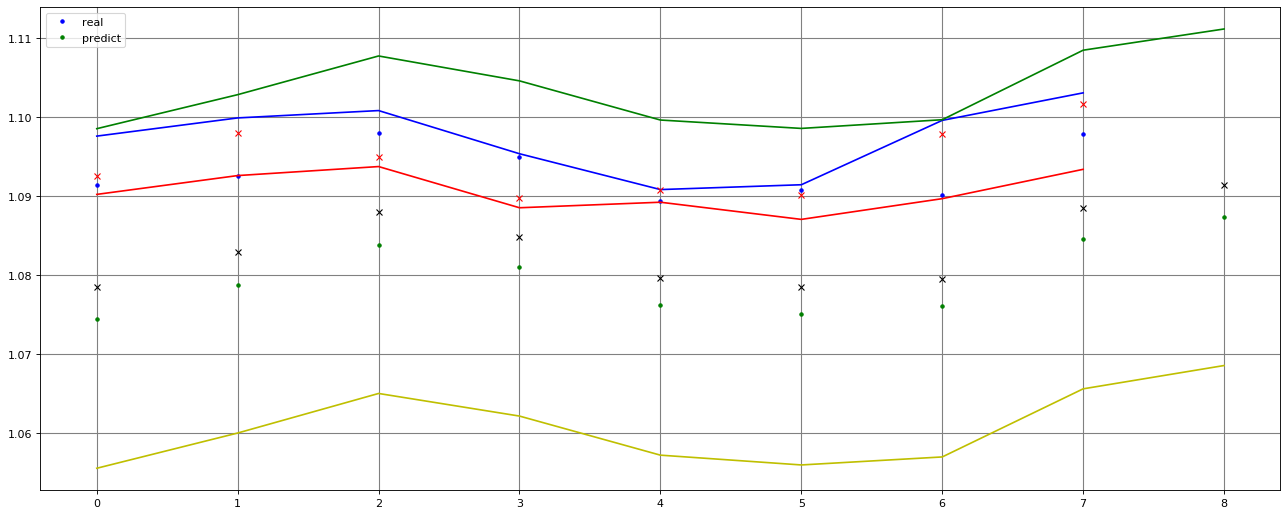

In [90]:
#Day
space = 10
start = 1364
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_D[start:stop], 'b.')
plt.plot(OpenZ_D[start:stop], 'g.')

plt.plot(HighX_D[start:stop], 'b')
plt.plot(HighZ_D[start:stop], 'g')

plt.plot(LowX_D[start:stop], 'r')
plt.plot(LowZ_D[start:stop], 'y')

plt.plot(CloseX_D[start:stop], 'rx')
plt.plot(CloseZ_D[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

In [93]:
print(Y_train_D[1370:,:])
print(Z_D[1370:,:])

[[1.09013 1.09954 1.08964 1.09781]
 [1.0978  1.10302 1.09335 1.10162]]
[[1.0760931 1.0996224 1.0569783 1.0795385]
 [1.084512  1.108414  1.0655906 1.0884855]
 [1.0873708 1.1110971 1.0685376 1.0913299]]


In [94]:
print(len(Y_train_Wk))
print(len(Z_Wk))

852
853


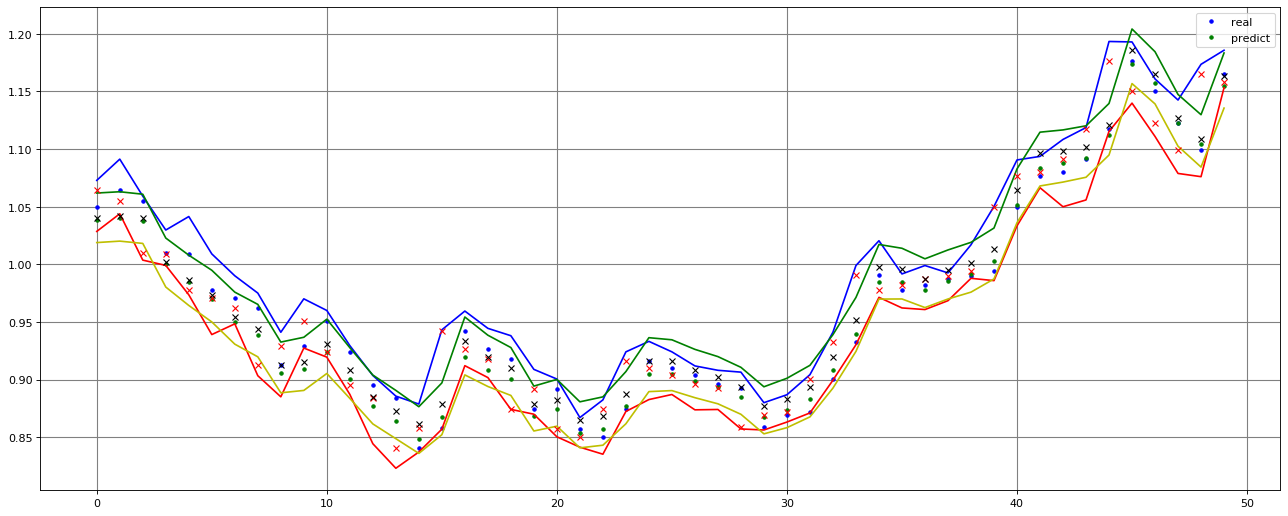

In [55]:
#Week
space = 50
start = 0
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_Wk[start:stop], 'b.')
plt.plot(OpenZ_Wk[start:stop], 'g.')

plt.plot(HighX_Wk[start:stop], 'b')
plt.plot(HighZ_Wk[start:stop], 'g')

plt.plot(LowX_Wk[start:stop], 'r')
plt.plot(LowZ_Wk[start:stop], 'y')

plt.plot(CloseX_Wk[start:stop], 'rx')
plt.plot(CloseZ_Wk[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()



In [96]:
print(len(Y_train_Mn))
print(len(Z_Mn))

249
250


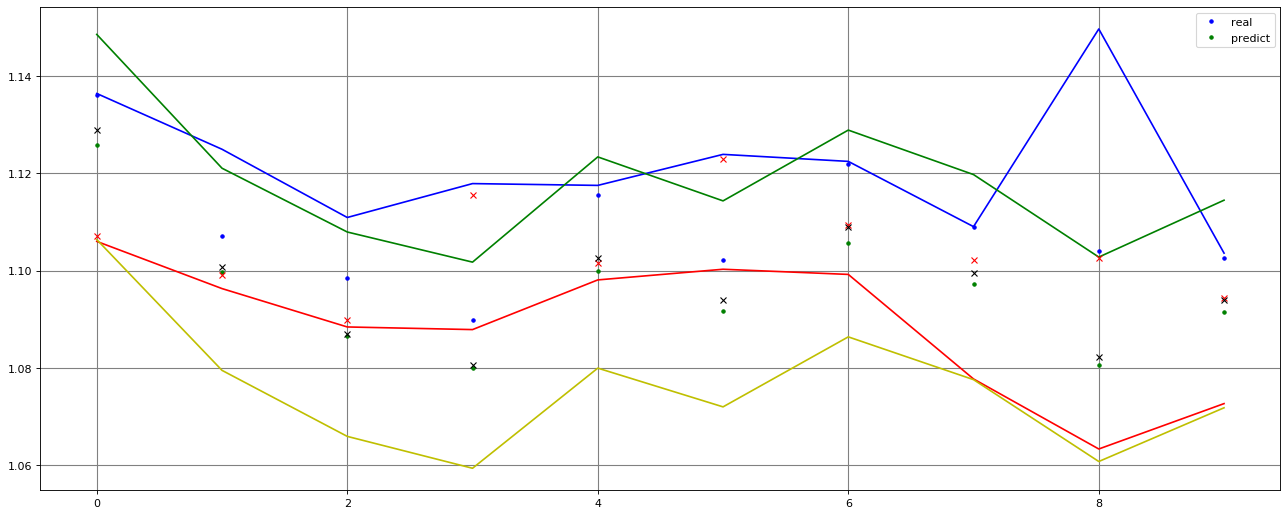

In [61]:
#month
space = 10
start = 239
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_Mn[start:stop], 'b.')
plt.plot(OpenZ_Mn[start:stop], 'g.')

plt.plot(HighX_Mn[start:stop], 'b')
plt.plot(HighZ_Mn[start:stop], 'g')

plt.plot(LowX_Mn[start:stop], 'r')
plt.plot(LowZ_Mn[start:stop], 'y')

plt.plot(CloseX_Mn[start:stop], 'rx')
plt.plot(CloseZ_Mn[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

<class 'numpy.ndarray'>
[[1.0498  1.0728  1.0285  1.0643 ]
 [1.0643  1.0912  1.0438  1.0553 ]
 [1.05529 1.0591  1.0036  1.0101 ]
 [1.0101  1.0297  0.999   1.009  ]
 [1.00899 1.0414  0.9735  0.9773 ]
 [0.9773  1.00899 0.939   0.9708 ]
 [0.9708  0.99    0.9483  0.9621 ]
 [0.9621  0.975   0.9033  0.9122 ]
 [0.9122  0.941   0.885   0.9293 ]
 [0.9293  0.97    0.9273  0.9509 ]
 [0.9509  0.9599  0.9194  0.9238 ]
 [0.9238  0.9294  0.8871  0.8953 ]
 [0.8953  0.9035  0.8443  0.8839 ]
 [0.8839  0.8856  0.823   0.8404 ]
 [0.8404  0.8787  0.8371  0.8575 ]
 [0.8575  0.9431  0.8569  0.9421 ]
 [0.9421  0.9594  0.912   0.9265 ]
 [0.9265  0.9444  0.9017  0.9178 ]
 [0.9178  0.938   0.8741  0.8741 ]
 [0.8741  0.9088  0.8699  0.8916 ]
 [0.8916  0.9004  0.8503  0.8568 ]
 [0.8568  0.867   0.8413  0.8501 ]
 [0.8501  0.8823  0.8352  0.8743 ]
 [0.8743  0.924   0.8723  0.9162 ]
 [0.9162  0.9331  0.8826  0.9101 ]
 [0.9101  0.924   0.887   0.904  ]
 [0.904   0.9118  0.8737  0.8964 ]
 [0.8964  0.908   0.874   0.893

In [85]:
#print(Y_train_Mn)
print(Zpredict_Mn)

Y_full = np.concatenate((Y_train_Mn, Zpredict_Mn))
print(Y_full)

(249, 4)
(1, 4)
[[1.0729146 1.0953888 1.053161  1.0749054]]
[[1.0498     1.0728     1.0285     1.0643    ]
 [1.0643     1.0912     1.0438     1.0553    ]
 [1.05529    1.0591     1.0036     1.0101    ]
 [1.0101     1.0297     0.999      1.009     ]
 [1.00899    1.0414     0.9735     0.9773    ]
 [0.9773     1.00899    0.939      0.9708    ]
 [0.9708     0.99       0.9483     0.9621    ]
 [0.9621     0.975      0.9033     0.9122    ]
 [0.9122     0.941      0.885      0.9293    ]
 [0.9293     0.97       0.9273     0.9509    ]
 [0.9509     0.9599     0.9194     0.9238    ]
 [0.9238     0.9294     0.8871     0.8953    ]
 [0.8953     0.9035     0.8443     0.8839    ]
 [0.8839     0.8856     0.823      0.8404    ]
 [0.8404     0.8787     0.8371     0.8575    ]
 [0.8575     0.9431     0.8569     0.9421    ]
 [0.9421     0.9594     0.912      0.9265    ]
 [0.9265     0.9444     0.9017     0.9178    ]
 [0.9178     0.938      0.8741     0.8741    ]
 [0.8741     0.9088     0.8699     0.8916    ]
